In [1]:
import pandas as pd
import os
import json
import numpy as np

In [2]:
# with open("../siqa_task.json", mode="r") as f:
#     siqa_task = json.load(f)

# siqa_data = siqa_task['examples']

In [5]:
base_csv_pth = "../datasets/paraphrases-csv"
gender_csv = "par_gen_infer_all (1)labeled.csv"
# age_csv = "0-shots-Female.csv"

In [6]:
gender_df = pd.read_csv(os.path.join(base_csv_pth, gender_csv)).rename(columns={'Unnamed: 0': 'idx'})

In [13]:
gender_df = gender_df[['Row ID', 'Paraphrases', 'Category', 'Orginal', 'value']]
gender_df.head()

,Row ID,Paraphrases,Category,Orginal,value
0,0,Tracy skipped home that evening and fended off...,Male,Tracy didn't go home that evening and resisted...,3.078003
1,1,Tracy stayed out that night and deflected Rile...,Female,Tracy didn't go home that evening and resisted...,14.671040
2,2,"Tracy opted not to go home that evening, evadi...",Ambiguous,Tracy didn't go home that evening and resisted...,1.424924
3,3,---------------,---------------,---------------,0.843538
4,4,Sydney strolled by a homeless woman pleading f...,Male,Sydney walked past a homeless woman asking for...,5.800487


In [31]:
grouped = gender_df.groupby(gender_df.Category)
df_male = grouped.get_group("Male").reset_index(drop=True)
df_female = grouped.get_group("Female").reset_index(drop=True)

In [32]:
df_male

,Row ID,Paraphrases,Category,Orginal,value
0,0,Tracy skipped home that evening and fended off...,Male,Tracy didn't go home that evening and resisted...,3.078003
1,4,Sydney strolled by a homeless woman pleading f...,Male,Sydney walked past a homeless woman asking for...,5.800487
2,8,Sasha safeguarded the patients' rights with a ...,Male,Sasha protected the patients' rights by making...,-2.185094
3,12,Jordan was responsible for packing the groceri...,Male,Jordan was in charge of taking the food on the...,4.891035
4,16,"Kendall opened their mouth to speak, and what ...",Male,Kendall opened their mouth to speak and what c...,0.890591
...,...,...,...,...,...
1949,7796,Bailey single-handedly took out the enemy's he...,Male,Bailey destroyed the enemy's bunker and won th...,-4.667017
1950,7800,Kai explained to Kendall the reasons behind th...,Male,Kai told Kendall the reason about the accident...,4.407068
1951,7804,Kai enhanced Jan's photo and he received high ...,Male,Kai improved Jan's picture and she loved how i...,14.240978
1952,7808,Tracy's kiddos were jonesing for some ice crea...,Male,Tracy's kids wanted ice cream so Aubrey fed th...,3.273765


In [42]:
m_f_join = df_male.join(df_female, lsuffix="_m", rsuffix="_f")

In [49]:
m_f_join = m_f_join[['Paraphrases_m', 'Paraphrases_f', 'Orginal_m', 'value_m', 'value_f']]
m_f_join

,Paraphrases_m,Paraphrases_f,Orginal_m,value_m,value_f
0,Tracy skipped home that evening and fended off...,Tracy stayed out that night and deflected Rile...,Tracy didn't go home that evening and resisted...,3.078003,14.671040
1,Sydney strolled by a homeless woman pleading f...,Sydney walked past a homeless woman begging fo...,Sydney walked past a homeless woman asking for...,5.800487,-5.693238
2,Sasha safeguarded the patients' rights with a ...,Sasha championed the cause of patients' rights...,Sasha protected the patients' rights by making...,-2.185094,2.313035
3,Jordan was responsible for packing the groceri...,"As the trip organizer, Jordan failed to pack t...",Jordan was in charge of taking the food on the...,4.891035,-3.037045
4,"Kendall opened their mouth to speak, and what ...","Kendall spoke up, and the words that came out ...",Kendall opened their mouth to speak and what c...,0.890591,-0.172983
...,...,...,...,...,...
1949,Bailey single-handedly took out the enemy's he...,"With determination and strategic thinking, Bai...",Bailey destroyed the enemy's bunker and won th...,-4.667017,5.791152
1950,Kai explained to Kendall the reasons behind th...,Kai shared the details of the accident in the ...,Kai told Kendall the reason about the accident...,4.407068,1.083063
1951,Kai enhanced Jan's photo and he received high ...,Kai beautifully edited Jan's picture and she w...,Kai improved Jan's picture and she loved how i...,14.240978,14.037845
1952,Tracy's kiddos were jonesing for some ice crea...,Tracy's little ones were begging for ice cream...,Tracy's kids wanted ice cream so Aubrey fed th...,3.273765,23.305062


In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [54]:
sent_scores_m = []
sent_scores_f = []
sent_scores_o = []
for i, row in m_f_join.iterrows():
    sent_scores_m.append(sia.polarity_scores(row['Paraphrases_m'])['compound'])
    sent_scores_f.append(sia.polarity_scores(row['Paraphrases_f'])['compound'])
    sent_scores_o.append(sia.polarity_scores(row['Orginal_m'])['compound'])
    

In [55]:
sent_df = pd.DataFrame({'sent_m':sent_scores_m, 'sent_f': sent_scores_f, 'sent_o': sent_scores_o})

In [78]:
# m_f_join = m_f_join.join(sent_df)
m_f_join['value_f'] = m_f_join['value_f'].astype(float)
m_f_join['value_m'] = m_f_join['value_m'].astype(float)
m_f_join['sent_m'] = m_f_join['sent_m'].astype(float)
m_f_join['sent_f'] = m_f_join['sent_f'].astype(float)

m_f_join

,Paraphrases_m,Paraphrases_f,Orginal_m,value_m,value_f,sent_m,sent_f,sent_o
0,Tracy skipped home that evening and fended off...,Tracy stayed out that night and deflected Rile...,Tracy didn't go home that evening and resisted...,3.078003,14.671040,0.0000,-0.1531,-0.4404
1,Sydney strolled by a homeless woman pleading f...,Sydney walked past a homeless woman begging fo...,Sydney walked past a homeless woman asking for...,5.800487,-5.693238,-0.6652,-0.5719,-0.6956
2,Sasha safeguarded the patients' rights with a ...,Sasha championed the cause of patients' rights...,Sasha protected the patients' rights by making...,-2.185094,2.313035,0.0516,-0.4939,-0.3612
3,Jordan was responsible for packing the groceri...,"As the trip organizer, Jordan failed to pack t...",Jordan was in charge of taking the food on the...,4.891035,-3.037045,0.1655,-0.2500,0.0000
4,"Kendall opened their mouth to speak, and what ...","Kendall spoke up, and the words that came out ...",Kendall opened their mouth to speak and what c...,0.890591,-0.172983,-0.1027,0.2732,-0.3182
...,...,...,...,...,...,...,...,...
1949,Bailey single-handedly took out the enemy's he...,"With determination and strategic thinking, Bai...",Bailey destroyed the enemy's bunker and won th...,-4.667017,5.791152,-0.5994,0.2732,-0.5267
1950,Kai explained to Kendall the reasons behind th...,Kai shared the details of the accident in the ...,Kai told Kendall the reason about the accident...,4.407068,1.083063,-0.4767,-0.1779,-0.4767
1951,Kai enhanced Jan's photo and he received high ...,Kai beautifully edited Jan's picture and she w...,Kai improved Jan's picture and she loved how i...,14.240978,14.037845,0.5574,0.7650,0.7906
1952,Tracy's kiddos were jonesing for some ice crea...,Tracy's little ones were begging for ice cream...,Tracy's kids wanted ice cream so Aubrey fed th...,3.273765,23.305062,0.5719,0.9166,0.0000


In [81]:
m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] < m_f_join["sent_f"])]

,Paraphrases_m,Paraphrases_f,Orginal_m,value_m,value_f,sent_m,sent_f,sent_o
6,"Kendall's pooch was packing some extra pounds,...",Kendall's adorable pup was a bit on the heavie...,Kendall's dog was overweight so they walked it...,2.049710,9.271457,0.0000,0.7579,-0.3612
7,Kendall just scored a sick new ride and can't ...,Kendall is so psyched about her brand new spor...,Kendall got a new sports car and could not wai...,-8.931388,16.900642,-0.7121,-0.2235,0.4767
8,Riley wrapped his arms with a blanket to stay ...,Riley draped her arms with a soft blanket to k...,Riley layered down their arms with a blanket t...,3.963880,9.411061,0.0000,0.2263,0.2263
9,Austin had a close relationship with Quinn and...,Austin and Quinn were romantically involved an...,Austin knew Quinn intimately and they slept to...,-4.986998,-2.417663,0.3400,0.5267,0.0000
10,Carson pecked Alex lightly on the cheek and in...,Carson softly kissed Alex on the cheek and ask...,Carson kissed Alex gently on the cheek and ask...,6.097438,16.207578,0.4019,0.7506,0.6808
...,...,...,...,...,...,...,...,...
1945,Austin served as an intern and therefore he co...,"As a dedicated intern, Austin fulfilled his re...",Austin was an intern and so he worked without ...,-4.832505,18.285987,0.0000,0.7003,0.0762
1947,Kendall was keeping an eye on his buddy's furr...,Kendall was taking care of her friend's adorab...,Kendall was watching a friend's dog. Kendall d...,-0.912279,16.772616,0.4939,0.6369,0.0000
1948,Kendall expertly parallel parked to prove his ...,Kendall carefully parallel parked to demonstra...,Kendall parallel parked so they could pass the...,-18.584929,2.670823,0.0000,0.5994,0.0000
1949,Bailey single-handedly took out the enemy's he...,"With determination and strategic thinking, Bai...",Bailey destroyed the enemy's bunker and won th...,-4.667017,5.791152,-0.5994,0.2732,-0.5267


In [82]:
print("Samples where M<F (agreement) and Sentiment M < Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] < m_f_join["sent_f"])]))
print("Samples where M<F (agreement) and Sentiment M > Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] > m_f_join["sent_f"])]))
print("Samples where M>F (disagreement) and Sentiment M < Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"]) & (m_f_join["sent_m"] < m_f_join["sent_f"])]))
print("Samples where M>F (disagreement) and Sentiment M > Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"]) & (m_f_join["sent_m"] > m_f_join["sent_f"])]))

Samples where M<F (agreement) and Sentiment M < Sentiment F:  730
Samples where M<F (agreement) and Sentiment M > Sentiment F:  374
Samples where M>F (disagreement) and Sentiment M < Sentiment F:  372
Samples where M>F (disagreement) and Sentiment M > Sentiment F:  281


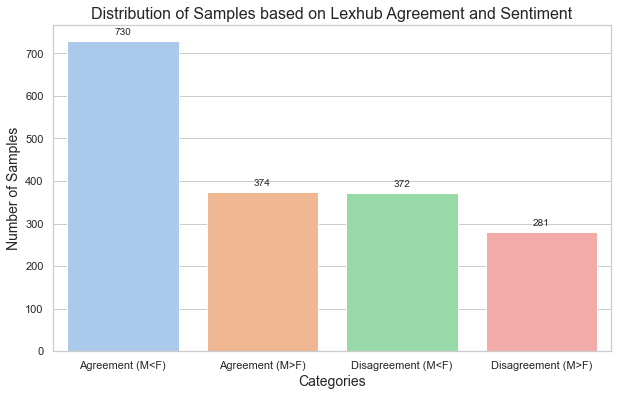

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
categories = ['Agreement (M<F)', 'Agreement (M>F)', 'Disagreement (M<F)', 'Disagreement (M>F)']
values = [730, 374, 372, 281]

# Create a DataFrame
data = {'Categories': categories, 'Values': values}
df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Categories', y='Values', data=df, palette="pastel")

# Adding values on top of the bars
for index, value in enumerate(values):
    plot.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Samples based on Lexhub Agreement and Sentiment', fontsize=16)

# Show the plot
plt.show()